In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [11]:
def predict_sales(x,weight,bias):
    return weight*x + bias

In [12]:
def cost_function(x,y,weight,bias):
    total_error = 0
    for i in range(len(x)):
        total_error += (y[i] - (weight*x[i]+bias))**2
    return total_error/len(x)

In [13]:
def update_weights(x,y,weight,bias,learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    for i in range(len(x)):
        weight_deriv += -2*x[i]*(y[i] - (weight*x[i] + bias))
        bias_deriv += -2*(y[i]-(weight*x[i]+bias))
    weight -= (weight_deriv/len(x))*learning_rate
    bias -= (bias_deriv/len(x))*learning_rate
    return weight, bias

In [14]:
def train(x,y,weight=None,bias=None,learning_rate=0.001,iters=1000):
    if weight is None:
        weight = random.uniform(-1, 1)
    if bias is None:
        bias = random.uniform(-1, 1)
    cost_history = []
    for i in range(iters):
        weight, bias = update_weights(x,y,weight,bias,learning_rate)
        cost = cost_function(x,y,weight,bias)
        cost_history.append(cost)
        
        #if i % 10 == 0:
        #    print(f"iter={i}    weight={weight}    bias={bias}    cost={cost}")
    return weight, bias, cost_history

In [15]:
data = pd.read_csv('Food_Delivery_Times.csv')
data

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [16]:
X = data.Distance_km
Y = data.Delivery_Time_min
weight, bias, cost_history = train(X,Y)

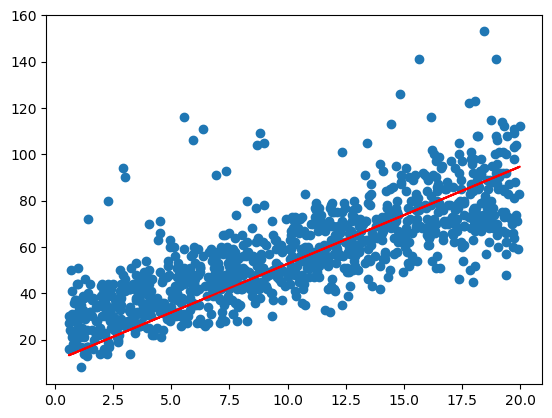

In [17]:
plt.scatter(X,Y)
plt.plot(X,predict_sales(X,weight,bias),color="red")

In [18]:
cost_history

[1951.9007081876205,
 1202.9603634267953,
 802.4271568216114,
 588.1902707782782,
 473.56767484776515,
 412.2097514099271,
 379.3329663808618,
 361.6853536259095,
 352.1809742886309,
 347.03091664396203,
 344.2092173637155,
 342.6325765938888,
 341.7217446428027,
 341.166991719694,
 340.80270261293856,
 340.54032139987794,
 340.3324964139076,
 340.1539082539953,
 339.9910183586102,
 339.83658748117733,
 339.6867446723628,
 339.5394200400265,
 339.39350673265744,
 339.2484128448049,
 339.10382181711134,
 338.95956432017164,
 338.8155497497428,
 338.67172959666186,
 338.52807786041586,
 338.3845805761204,
 338.2412302145063,
 338.09802268753754,
 337.95495574730063,
 337.81202812986453,
 337.66923909750744,
 337.5265881939311,
 337.3840751133807,
 337.2416996306543,
 337.09946156368375,
 336.9573607535255,
 336.81539705365594,
 336.6735703242567,
 336.5318804291527,
 336.3903272341737,
 336.24891060628426,
 336.107630413112,
 335.96648652270005,
 335.82547880337216,
 335.6846071236598,
 